In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset (Replace 'ev_data.csv' with your actual dataset file)
df = pd.read_csv('datasets/ev_data.csv')
df1 = pd.read_csv('datasets/charging_stations.csv')

# Data cleaning (if necessary)
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # Or use df.fillna() if you want to fill them with specific values

# Print unique regions
unique_regions = df['region'].unique()
print(unique_regions)

# Data cleaning (if necessary)
# Check for missing values
# Filter for EV sales data
# Filter the dataframe for Historical data only
df_historical = df[df['category'] == 'Historical']

# Drop or fill missing values in historical data if necessary
df_historical = df_historical.dropna()  # Or use df.fillna() to fill missing values

# Print unique regions for historical data
unique_regions = df_historical['region'].unique()
print(f"Unique regions in historical data: {unique_regions}")

# Filter for EV sales data (historical)
ev_sales = df_historical[df_historical['parameter'] == 'EV sales']

# Aggregate EV sales by region and year (historical data only)
sales_summary = ev_sales.groupby(['region', 'year'])['value'].sum().reset_index()
sales_summary.rename(columns={'value': 'EV Sales (Total)'}, inplace=True)

# Filter for Charging stations data (historical)
charging_ports = df_historical[df_historical['parameter'] == 'EV charging points']

# Aggregate charging ports by region and year (historical data only)
charging_data = charging_ports.groupby(['region', 'year'])['value'].sum().reset_index()
charging_data.rename(columns={'value': 'Charging Ports (Total)'}, inplace=True)

# Merge EV sales and charging stations data on region and year
merged_data = pd.merge(sales_summary, charging_data, on=['region', 'year'], how='left')

# Coordinates for each region (assuming this dictionary is already defined)
# Coordinates for each region
coordinates = {
    'Australia': {'latitude': -25.2744, 'longitude': 133.7751},
    'Austria': {'latitude': 47.5162, 'longitude': 14.5501},
    'Belgium': {'latitude': 50.8503, 'longitude': 4.3517},
    'Brazil': {'latitude': -14.2350, 'longitude': -51.9253},
    'Bulgaria': {'latitude': 42.7339, 'longitude': 25.4858},
    'Canada': {'latitude': 56.1304, 'longitude': -106.3468},
    'Chile': {'latitude': -35.6751, 'longitude': -71.5430},
    'China': {'latitude': 35.8617, 'longitude': 104.1954},
    'Colombia': {'latitude': 4.5709, 'longitude': -74.2973},
    'Costa Rica': {'latitude': 9.7489, 'longitude': -83.7534},
    'Croatia': {'latitude': 45.1, 'longitude': 15.2},
    'Cyprus': {'latitude': 35.1264, 'longitude': 33.4299},
    'Czech Republic': {'latitude': 49.8175, 'longitude': 15.4720},
    'Denmark': {'latitude': 56.2639, 'longitude': 9.5018},
    'Estonia': {'latitude': 58.5953, 'longitude': 25.0136},
    'EU27': {'latitude': 52.0, 'longitude': 13.0},
    'Europe': {'latitude': 54.5260, 'longitude': 15.2551},
    'Finland': {'latitude': 61.9241, 'longitude': 25.7482},
    'France': {'latitude': 46.6034, 'longitude': 1.8883},
    'Germany': {'latitude': 51.1657, 'longitude': 10.4515},
    'Greece': {'latitude': 39.0742, 'longitude': 21.8243},
    'Hungary': {'latitude': 47.1625, 'longitude': 19.5033},
    'Iceland': {'latitude': 64.9631, 'longitude': -19.0208},
    'India': {'latitude': 20.5937, 'longitude': 78.9629},
    'Indonesia': {'latitude': -0.7893, 'longitude': 113.9213},
    'Ireland': {'latitude': 53.1424, 'longitude': -7.6921},
    'Israel': {'latitude': 31.9686, 'longitude': 34.7695},
    'Italy': {'latitude': 41.8719, 'longitude': 12.5674},
    'Japan': {'latitude': 36.2048, 'longitude': 138.2529},
    'Korea': {'latitude': 35.9078, 'longitude': 127.7669},
    'Latvia': {'latitude': 56.8796, 'longitude': 24.6032},
    'Lithuania': {'latitude': 55.1694, 'longitude': 23.8813},
    'Luxembourg': {'latitude': 49.6117, 'longitude': 6.13},
    'Mexico': {'latitude': 23.6345, 'longitude': -102.5528},
    'Netherlands': {'latitude': 52.3794, 'longitude': 4.9009},
    'New Zealand': {'latitude': -40.9006, 'longitude': 174.8860},
    'Norway': {'latitude': 60.4720, 'longitude': 8.4689},
    'Poland': {'latitude': 51.9194, 'longitude': 19.1451},
    'Portugal': {'latitude': 39.3999, 'longitude': -8.2245},
    'Rest of the world': {'latitude': 20.0, 'longitude': 0.0},
    'Romania': {'latitude': 45.9432, 'longitude': 24.9668},
    'Seychelles': {'latitude': -4.6796, 'longitude': 55.4920},
    'Slovakia': {'latitude': 48.6690, 'longitude': 19.6990},
    'Slovenia': {'latitude': 46.1511, 'longitude': 14.9955},
    'South Africa': {'latitude': -30.5595, 'longitude': 22.9375},
    'Spain': {'latitude': 40.4637, 'longitude': -3.7492},
    'Sweden': {'latitude': 60.1282, 'longitude': 18.6435},
    'Switzerland': {'latitude': 46.8182, 'longitude': 8.2275},
    'Thailand': {'latitude': 15.8700, 'longitude': 100.9925},
    'Turkiye': {'latitude': 38.9637, 'longitude': 35.2433},
    'United Arab Emirates': {'latitude': 23.4241, 'longitude': 53.8478},
    'United Kingdom': {'latitude': 51.5074, 'longitude': -0.1278},
    'USA': {'latitude': 37.0902, 'longitude': -95.7129},
    'World': {'latitude': 0.0, 'longitude': 0.0}
}

# Add latitude and longitude columns based on region
merged_data['latitude'] = merged_data['region'].map(lambda x: coordinates.get(x, {'latitude': None})['latitude'])
merged_data['longitude'] = merged_data['region'].map(lambda x: coordinates.get(x, {'longitude': None})['longitude'])

# Check if there are any missing values in the latitude or longitude columns
missing_coords = merged_data[merged_data['latitude'].isnull()]
print(f"Missing coordinates for regions: {missing_coords['region'].unique()}")

# Handle missing values for Charging Ports (if necessary)
merged_data['Charging Ports (Total)'] = merged_data['Charging Ports (Total)'].fillna(0).astype(int)

# Save the final processed data to a new CSV file
merged_data.to_csv('ev_sales_and_charging_data.csv', index=False)

# Display the first few rows of the final merged DataFrame
print(merged_data.head())

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
Unique regions in historical data: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland'

C:\Users\nitub\AppData\Local\Temp\ipykernel_32532\2545183064.py:3: DtypeWarning: Columns (6,20,31,45,46,63,69,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('datasets/charging_stations.csv')


In [3]:
# Select the necessary columns
filtered_df = df1[df1['Status Code'] == 'E']

# Select the necessary columns
cleaned_df = filtered_df[['Station Name', 'Street Address', 'City', 'State', 'ZIP', 'Latitude', 'Longitude', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']]

# Rename the columns to be more readable if necessary
cleaned_df.columns = ['Station Name', 'Street_Address', 'City', 'State', 'ZIP', 'Latitude', 'Longitude', 'Level_1_Ports', 'Level_2_Ports', 'DC_Fast_Ports']
cleaned_df.replace("Unknown", pd.NA, inplace=True)

# Convert the relevant columns to numeric, ensuring 'Unknown' becomes NaN (NULL)
cleaned_df['Level_1_Ports'] = pd.to_numeric(cleaned_df['Level_1_Ports'], errors='coerce')
cleaned_df['Level_2_Ports'] = pd.to_numeric(cleaned_df['Level_2_Ports'], errors='coerce')
cleaned_df['DC_Fast_Ports'] = pd.to_numeric(cleaned_df['DC_Fast_Ports'], errors='coerce')

# Ensure Latitude and Longitude are numeric
cleaned_df['Latitude'] = pd.to_numeric(cleaned_df['Latitude'], errors='coerce')
cleaned_df['Longitude'] = pd.to_numeric(cleaned_df['Longitude'], errors='coerce')
# Write the cleaned data to a new CSV file
cleaned_df.to_csv('cleaned_charging_stations_filtered.csv', index=False)



print("Cleaned data has been written to 'cleaned_charging_stations.csv'.")
# Preview the dataset to understand its structure

df

C:\Users\sdeep\AppData\Local\Temp\ipykernel_16148\2697612334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.replace("Unknown", pd.NA, inplace=True)
C:\Users\sdeep\AppData\Local\Temp\ipykernel_16148\2697612334.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Level_1_Ports'] = pd.to_numeric(cleaned_df['Level_1_Ports'], errors='coerce')
C:\Users\sdeep\AppData\Local\Temp\ipykernel_16148\2697612334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Cleaned data has been written to 'cleaned_charging_stations.csv'.


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


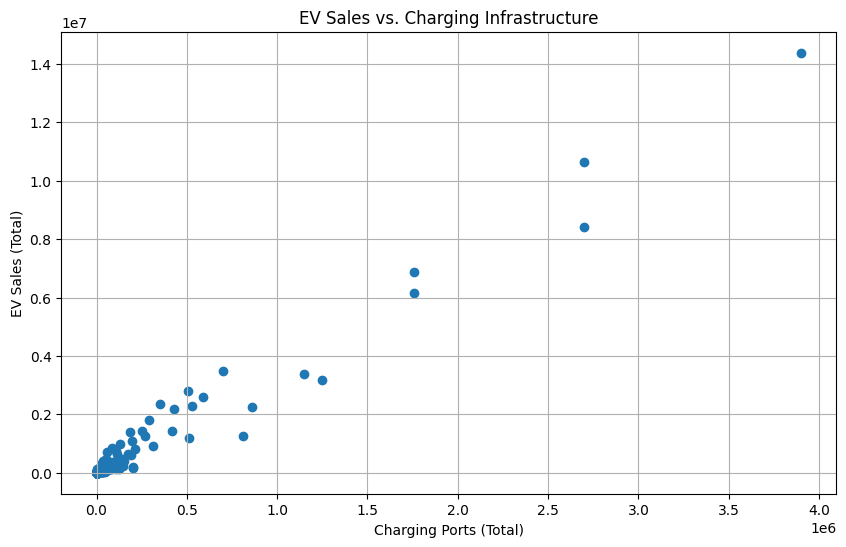

Pearson Correlation Coefficient: 0.9841428266183211


In [22]:
# Assuming your dataset has 'Charging Ports (Total)' and 'EV Sales (Total)' columns
data = pd.read_csv('ev_sales_and_charging_data.csv')  # Load your dataset

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Charging Ports (Total)'], data['EV Sales (Total)'], color='tab:blue')
plt.title('EV Sales vs. Charging Infrastructure')
plt.xlabel('Charging Ports (Total)')
plt.ylabel('EV Sales (Total)')
plt.grid(True)
plt.show()
correlation = data['Charging Ports (Total)'].corr(data['EV Sales (Total)'])
print(f'Pearson Correlation Coefficient: {correlation}')

In [23]:
X = data['Charging Ports (Total)'].values.reshape(-1, 1)  # Independent variable (charging stations)
y = data['EV Sales (Total)'].values  # Dependent variable (EV sales)

# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

# Print the regression line equation
print(f'Regression Line: EV Sales = {model.coef_[0]:.2f} * Charging Ports + {model.intercept_:.2f}')

NameError: name 'LinearRegression' is not defined

In [4]:
# Convert 'year' to integer if it's not already
df['year'] = df['year'].astype(int)

# Filter data for a specific country (e.g., Australia)
australia_df = df[df['region'] == 'Australia']

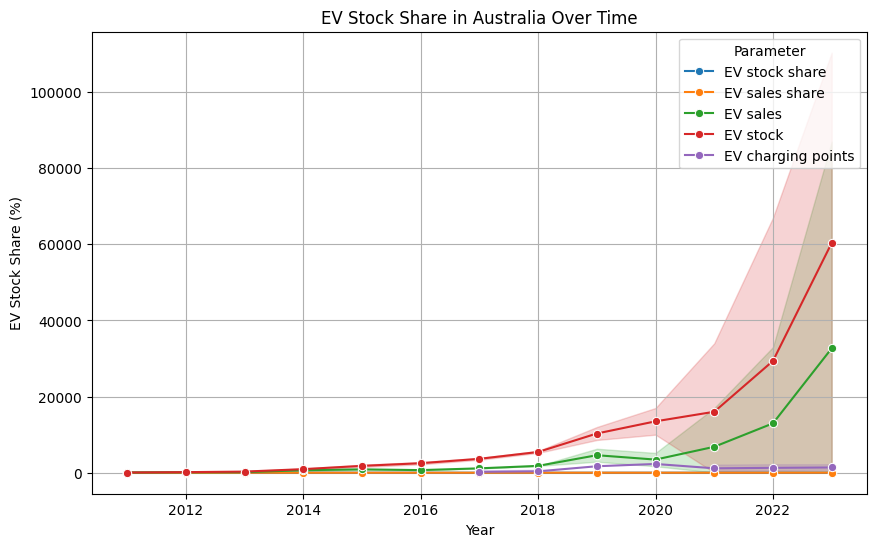

In [5]:
# Plotting the EV stock share in Australia over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=australia_df, x='year', y='value', hue='parameter', marker='o')
plt.title('EV Stock Share in Australia Over Time')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Parameter')
plt.grid(True)
plt.show()

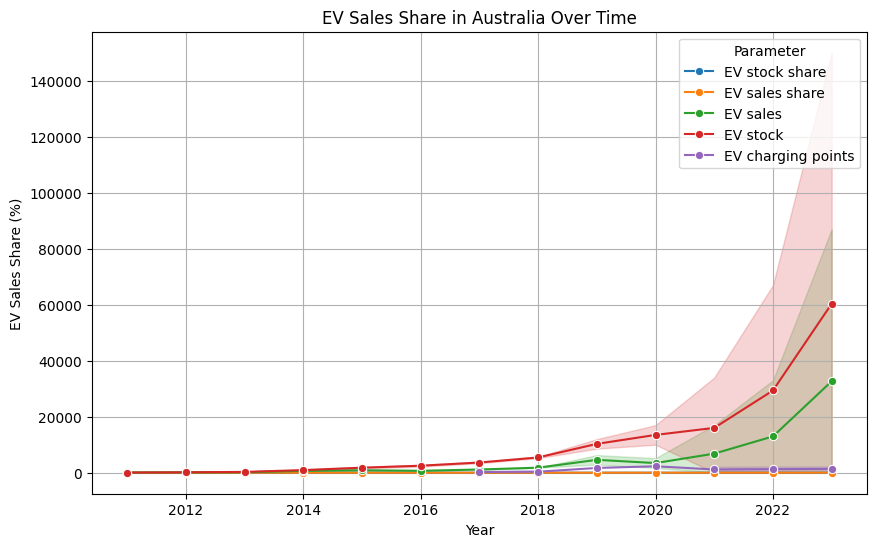

In [6]:
# Plotting EV sales share in Australia over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=australia_df, x='year', y='value', hue='parameter', marker='o')
plt.title('EV Sales Share in Australia Over Time')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Parameter')
plt.grid(True)
plt.show()

C:\Users\sdeep\AppData\Local\Temp\ipykernel_16148\3978664168.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_countries_df, x='region', y='value', hue='year', ci=None)


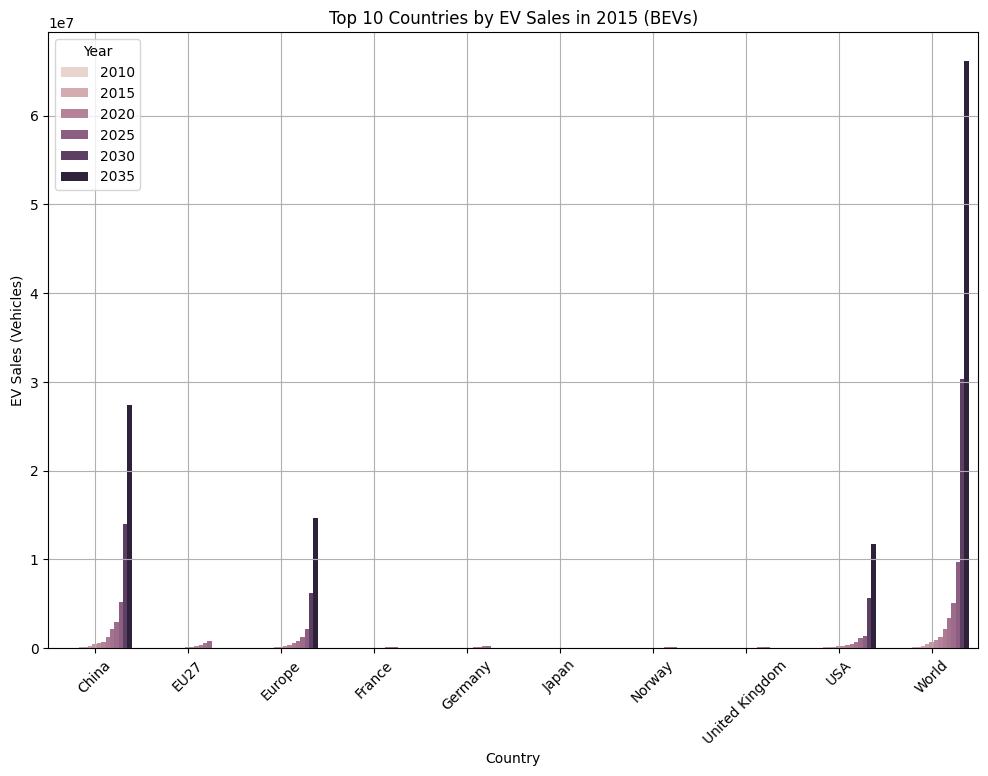

In [7]:
# Filter data for BEVs only
bevs_df = df[df['powertrain'] == 'BEV']

# Plotting global EV sales for BEVs across multiple countries (top 10 countries in 2015)
top_countries = bevs_df[bevs_df['year'] == 2015].groupby('region')['value'].sum().sort_values(ascending=False).head(10)
top_countries_df = bevs_df[bevs_df['region'].isin(top_countries.index)]

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries_df, x='region', y='value', hue='year', ci=None)
plt.title('Top 10 Countries by EV Sales in 2015 (BEVs)')
plt.xlabel('Country')
plt.ylabel('EV Sales (Vehicles)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

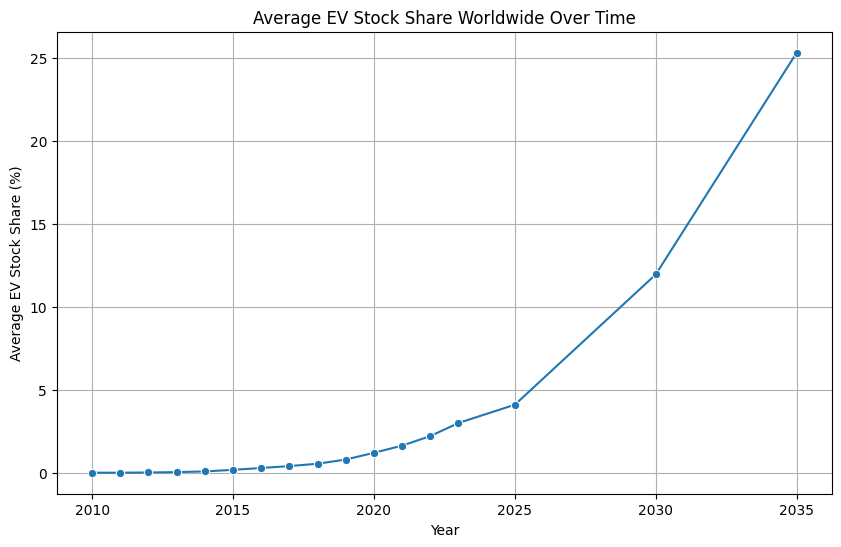

In [8]:
# Further analysis: Calculating the average EV stock share across all countries for each year
avg_ev_stock_share = df[df['parameter'] == 'EV stock share'].groupby('year')['value'].mean()

# Plot the average EV stock share over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_ev_stock_share.index, y=avg_ev_stock_share.values, marker='o')
plt.title('Average EV Stock Share Worldwide Over Time')
plt.xlabel('Year')
plt.ylabel('Average EV Stock Share (%)')
plt.grid(True)
plt.show()


In [9]:
sales_share_df = df[['region', 'category', 'parameter', 'mode', 'year', 'value']]
sales_share_df

,region,category,parameter,mode,year,value
0,Australia,Historical,EV stock share,Cars,2011,3.900000e-04
1,Australia,Historical,EV sales share,Cars,2011,6.500000e-03
2,Australia,Historical,EV sales,Cars,2011,4.900000e+01
3,Australia,Historical,EV stock,Cars,2011,4.900000e+01
4,Australia,Historical,EV stock,Cars,2012,2.200000e+02
...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,2035,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,2035,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,2035,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,2035,1.500000e+07


In [10]:
filtered_sales_share_df = sales_share_df[
    (sales_share_df['category'] == 'Historical') & 
    (sales_share_df['parameter'].isin(['EV stock share', 'EV sales share']))
]

# Display the filtered DataFrame
print(filtered_sales_share_df)

          region    category       parameter    mode  year     value
0      Australia  Historical  EV stock share    Cars  2011   0.00039
1      Australia  Historical  EV sales share    Cars  2011   0.00650
6      Australia  Historical  EV sales share    Cars  2012   0.03000
7      Australia  Historical  EV stock share    Cars  2012   0.00240
12     Australia  Historical  EV stock share    Cars  2013   0.00460
...          ...         ...             ...     ...   ...       ...
12365      World  Historical  EV stock share  Trucks  2023   0.36000
12366      World  Historical  EV sales share  Trucks  2023   0.91000
12375      World  Historical  EV stock share    Cars  2023   3.20000
12376      World  Historical  EV sales share    Cars  2023  18.00000
12377      World  Historical  EV stock share    Vans  2023   0.85000

[2547 rows x 6 columns]


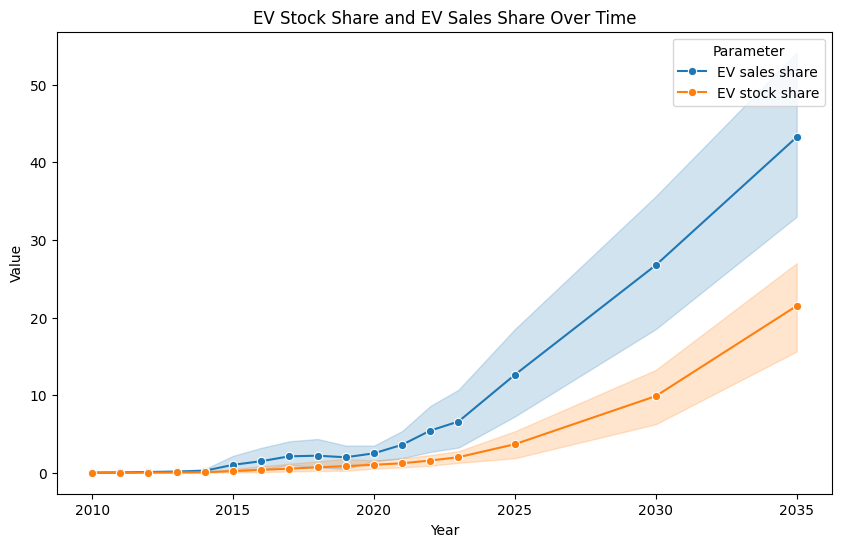

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for relevant parameters
trend_data = sales_share_df[
    (sales_share_df['region'] == 'World') &
    (sales_share_df['parameter'].isin(['EV stock share', 'EV sales share']))
]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='year', y='value', hue='parameter', marker='o')
plt.title('EV Stock Share and EV Sales Share Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Parameter')
plt.show()


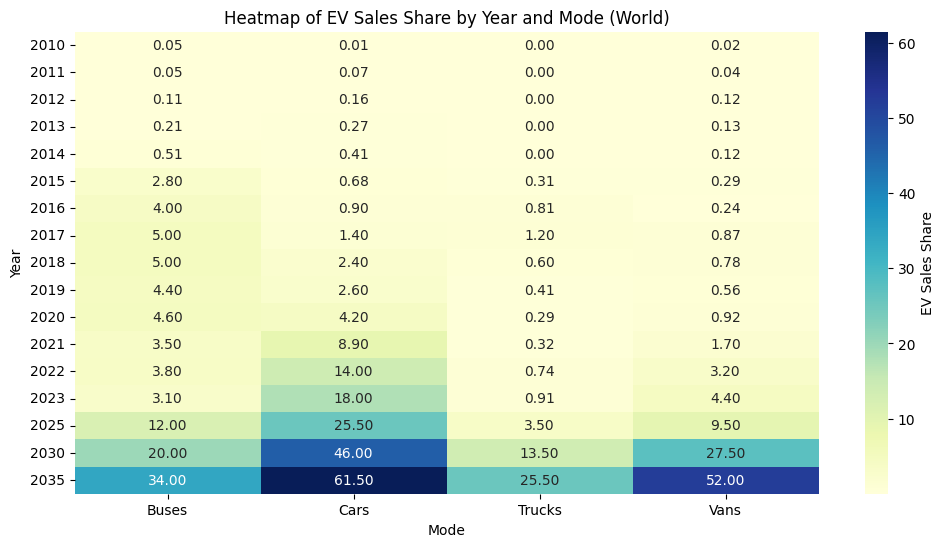

In [12]:
# Filter for 'EV sales share' and 'World' region
heatmap_data = sales_share_df[
    (sales_share_df['parameter'] == 'EV sales share') &
    (sales_share_df['region'] == 'World')
]

# Pivot the data for heatmap, using 'mode' as columns instead of 'parameter'
heatmap_pivot = heatmap_data.pivot_table(index='year', columns='mode', values='value', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'EV Sales Share'})
plt.title('Heatmap of EV Sales Share by Year and Mode (World)')
plt.ylabel('Year')
plt.xlabel('Mode')
plt.show()

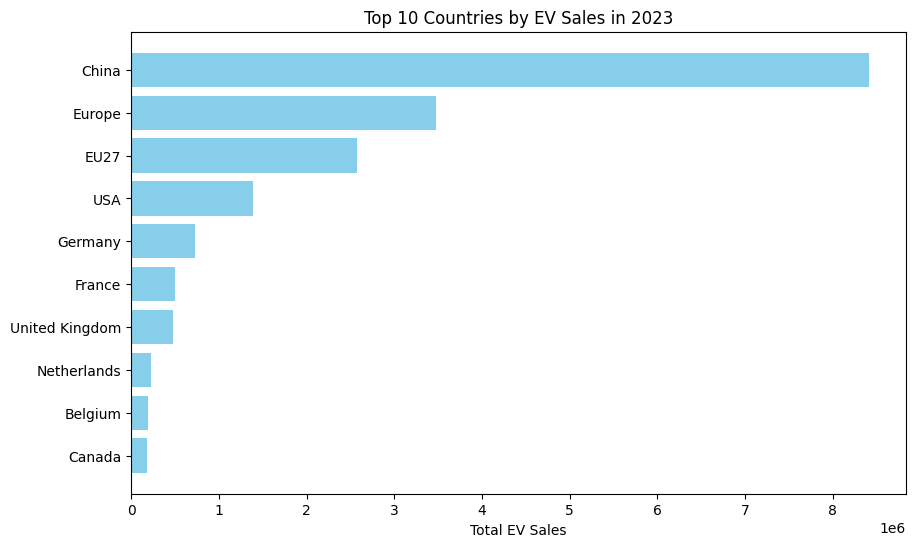

In [18]:
# Filter the DataFrame based on the conditions: 'EV sales', year 2023, and category 'Historical'
new_df = df[(df['parameter'] == 'EV sales') & 
            (df['year'] == 2023) & 
            (df['category'] == 'Historical') & 
            (df['region'] != 'World')]

# Group by 'region' and calculate the sum of 'value' for each region
new_df_grouped = new_df.groupby('region', as_index=False)['value'].sum()

# Sort the new DataFrame by the 'value' column in descending order
new_df_sorted = new_df_grouped.sort_values(by='value', ascending=False)

# Get the top 10 countries by EV sales sum
top_10_countries = new_df_sorted.head(10)
top_10_countries
# Get the top 10 countries by EV sales sum
top_10_countries = new_df_sorted.head(10)

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(top_10_countries['region'], top_10_countries['value'], color='skyblue')  # Horizontal bar chart
plt.xlabel('Total EV Sales')  # X-axis label
plt.title('Top 10 Countries by EV Sales in 2023')  # Chart title
plt.gca().invert_yaxis()  # Invert y-axis to display highest values at the top
plt.show()